### Skład grupy:

Natalia Przewdzięk 276052

Mateusz Skrzątek 275975

Agata Stachnio 268330

# Wprowadzenie
W analizie procesów stochastycznych, rozważa się różne rodzaje rozkładów prawdopodobieństwa, które opisują zachowanie się zmiennych losowych w czasie. Jednym z nich jest rozkład arcusa sinusa, który znajduje zastosowanie w modelowaniu czasu spędzonego przez proces Wienera powyżej lub poniżej pewnej granicznej wartości, czasu osiągnięcia maksymalnej wartości oraz ostatniego momentu uderzenia na osi OX. W niniejszym sprawozdaniu przeprowadzimy symulację tych praw za pomocą procesu Wienera i porównamy wyniki z teoretycznymi wartościami.

# Symulacja za pomocą metody odwrotnej dystrybuanty dla $X \sim \text{Arcsine}$
   - Wykorzystamy metodę odwrotnej dystrybuanty do generowania próbek z rozkładu arcusa sinusa.
   - Na podstawie wygenerowanych próbek zbudujemy histogram oraz dystrybuantę empiryczną.
   - Porównamy teoretyczne gęstości prawdopodobieństwa oraz dystrybuantę z empinrycznymi wynikami, aby zweryfikować poprawność symulacji.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ARCSIN_RANDOM():
    """
    Generuje losową liczbę z rozkładu arcsinusa.
    
    Zwraca:
        float: Losowa liczba z rozkładu arcsinusa.
        
    Przykład użycia:
    >>> random_number = ARCSIN_RANDOM()
    >>> print(random_number)
    0.3849372876018458
    """
    return np.sin(np.pi/2 * np.random.uniform(0, 1))**2

def ARCSIN_RANDOM_SEQUENCE(n):
    """
    Generuje sekwencję losowych liczb z rozkładu arcsinusa.
    
    Args:
        n (int): Liczba losowych liczb do wygenerowania.
        
    Zwraca:
        list: Lista losowych liczb z rozkładu arcsinusa.
        
    Przykład użycia:
    >>> n = 5
    >>> sequence = ARCSIN_RANDOM_SEQUENCE(n)
    >>> print(sequence)
    [0.14492938872568174, 0.3091977715405684, 0.0675744815179482, 0.5170943187337628, 0.745655786312831]
    """
    return [ARCSIN_RANDOM() for _ in range(n)]

In [2]:
def ARCSIN_PDF(x):
    """
    Funkcja gęstości prawdopodobieństwa (PDF) rozkładu arcsinusa.
    
    Args:
        x (float): Wartość wejściowa.
        
    Zwraca:
        float: Gęstość prawdopodobieństwa w punkcie x.
        
    Przykład użycia:
    >>> x = 0.5
    >>> pdf_value = ARCSIN_PDF(x)
    >>> print(pdf_value)
    0.6366197723675814
    """
    if 0 < x < 1:
        return 1 / (np.pi * np.sqrt(x * (1 - x)))
    else:
        return 0
    
def ARCSIN_CDF(x):
    """
    Funkcja dystrybuanty (CDF) rozkładu arcsinusa.
    
    Args:
        x (float): Wartość wejściowa.
        
    Zwraca:
        float: Prawdopodobieństwo kumulatywne do x.
        
    Przykład użycia:
    >>> x = 0.3
    >>> cdf_value = ARCSIN_CDF(x)
    >>> print(cdf_value)
    0.36901011956554536
    """
    if x < 0:
        return 0
    elif 0 <= x <= 1:
        return (2 / np.pi) * np.arcsin(np.sqrt(x))
    else:
        return 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def ARCSIN_HISTOGRAM(arcsin_random_numbers, b):
    """
    Funkcja rysująca histogram wygenerowanych wartości rozkładu arcsin oraz porównująca go z teoretyczną gęstością rozkładu arcsin.

    Parametry:
    arcsin_random_numbers (array): Tablica wygenerowanych wartości rozkładu arcsin.
    b (int): Liczba przedziałów (binów) histogramu.
    
    Przykład użycia:
    >>> arcsin_random_numbers = ARCSIN_RANDOM_SEQUENCE(n)
    >>> b = 20
    >>> ARCSIN_HISTOGRAM(arcsin_random_numbers, b)
    """
    
    # Rysowanie histogramu empirycznego z wygenerowanych danych
    plt.figure(figsize=(8, 6))
    plt.hist(arcsin_random_numbers, bins=b, density=True, alpha=0.6, color='g', label='Empiryczny histogram')
    
    # Tworzenie danych do wykresu teoretycznej gęstości rozkładu arcsin
    x = np.linspace(0, 1, 1000)
    y = [ARCSIN_PDF(xs) for xs in x]
    
    # Rysowanie teoretycznej gęstości rozkładu arcsin
    plt.plot(x, y, 'r-', alpha=0.4, lw=2, label='Teoretyczna gęstość')
    
    # Ustawienia wykresu
    plt.title('Histogram wygenerowanych wartości rozkładu arcsin porównany z jego gęstością teoretyczną', fontsize=16)
    plt.xlabel('Wartość', fontsize=14)
    plt.ylabel('Gęstość', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.show()
    
def ARCSIN_DISTRIBUTION(arcsin_random_numbers):
    """
    Funkcja rysująca wykres dystrybuanty empirycznej z wygenerowanych wartości rozkładu arcsin oraz porównująca go z teoretyczną dystrybuantą rozkładu arcsin.

    Parametry:
    arcsin_random_numbers (array): Tablica wygenerowanych wartości rozkładu arcsin.
    
    Przykład użycia:
    >>> arcsin_random_numbers = ARCSIN_RANDOM_SEQUENCE(n)
    >>> ARCSIN_DISTRIBUTION(arcsin_random_numbers)
    """
    
    # Sortowanie wygenerowanych wartości rozkładu arcsin
    arcsin_sorted = np.sort(arcsin_random_numbers)
    
    # Obliczanie empirycznej dystrybuanty
    arcsin_ecdf = np.arange(1, len(arcsin_sorted) + 1) / len(arcsin_sorted)
    
    # Rysowanie empirycznej dystrybuanty
    plt.figure(figsize=(8, 6))
    plt.plot(arcsin_sorted, arcsin_ecdf, alpha=0.7, label='Empiryczna Dystrybuanta')
    
    # Tworzenie danych do wykresu teoretycznej dystrybuanty rozkładu arcsin
    x = np.linspace(0, 1, 1000)
    y = [ARCSIN_CDF(xs) for xs in x]
    
    # Rysowanie teoretycznej dystrybuanty rozkładu arcsin
    plt.plot(x, y, 'r-', alpha=0.3, lw=2, label='Teoretyczna dystrybuanta')
    
    # Ustawienia wykresu
    plt.legend()
    plt.title('Wykres dystrybuanty empirycznej z wygenerowanych wartości rozkładu arcsin z teoretyczną dystrybuantą', fontsize=16)
    plt.xlabel('Wartość', fontsize=14)
    plt.ylabel('Dystrybuanta', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(linestyle='--')
    plt.show()


In [4]:
n = 10**6
b = 200
arcsin_random_numbers = ARCSIN_RANDOM_SEQUENCE(n)

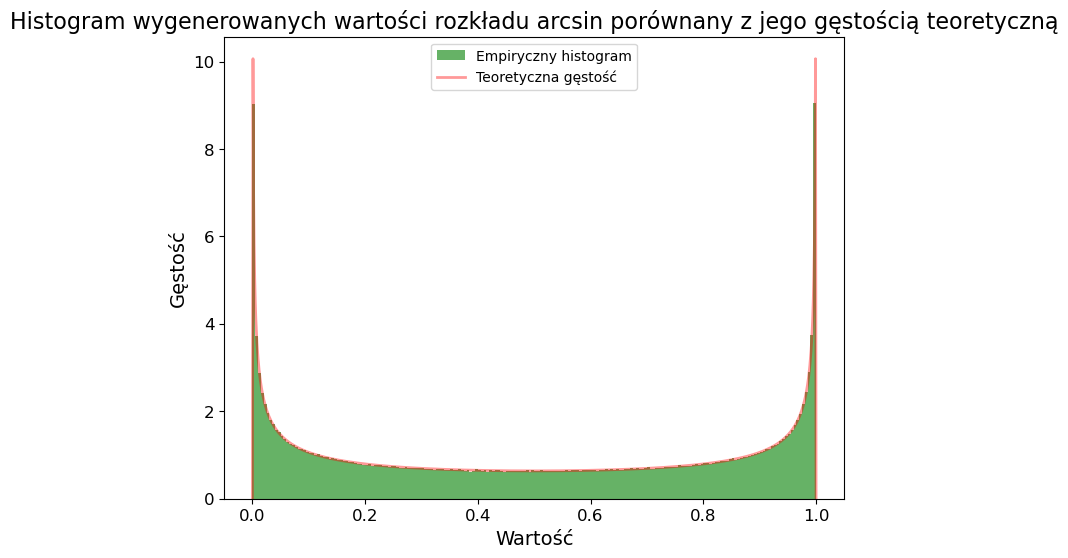

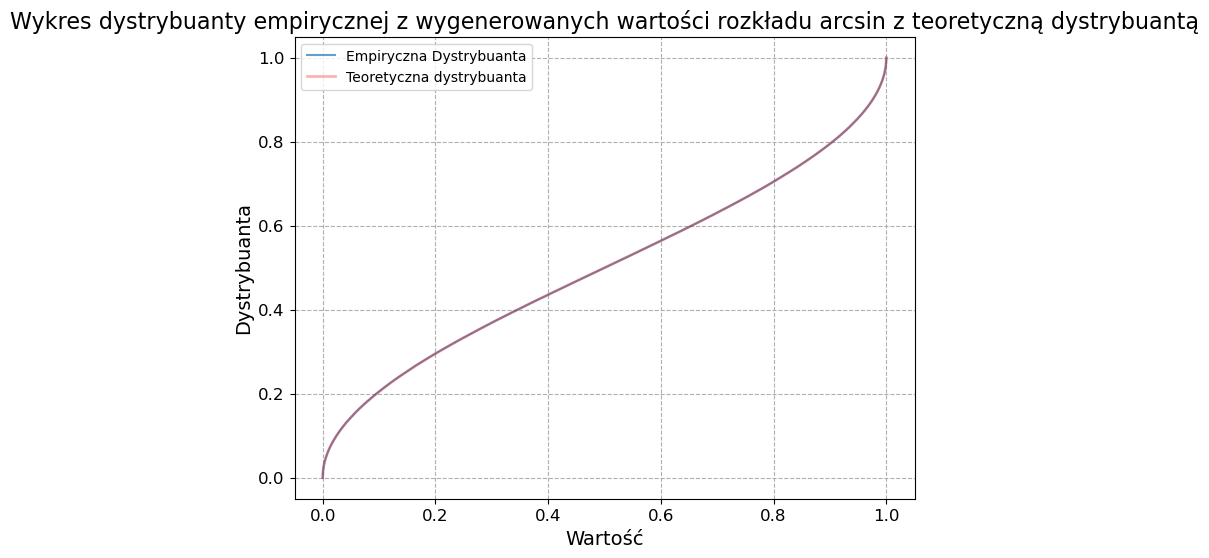

In [5]:
ARCSIN_HISTOGRAM(arcsin_random_numbers, b)
ARCSIN_DISTRIBUTION(arcsin_random_numbers)

# Generowanie procesu Wienera i przykładowa trajektoria
   - Przedstawimy funkcję generującą proces Wienera.
   - Wygenerujemy przykładową trajektorię procesu Wienera dla zadanego przedziału czasowego.
   - Zaprezentujemy tę trajektorię graficznie, aby zobaczyć zachowanie procesu Wienera na wykresie.

## Symulowanie Procesu Wienera

In [6]:
def WIENER_PROCESS(T, N):
    """
    Symulacja procesu Wienera.
    
    Parametry:
    T - całkowity czas symulacji
    N - liczba kroków
    
    Zwraca:
    Lista zawierająca trajektorię procesu Wienera.
    
    Przykład użycia:
    >>> T = 1.0
    >>> N = 1000
    >>> trajectory = WIENER_PROCESS(T, N)
    >>> print(trajectory)
    [ 0.          0.01427223  0.02128623 ... -0.01294662 -0.02119702 -0.02471719]
    """
    N = N -1 
    dt = T / N  # wielkość kroku czasowego
    
    # Generowanie losowych przyrostów z rozkładu normalnego
    dW = np.random.normal(0, np.sqrt(dt), N)
    
    # Inicjalizacja trajektorii
    W = np.zeros(N + 1)
    
    # Generowanie trajektorii procesu Wienera
    for i in range(1, N + 1):
        W[i] = W[i - 1] + dW[i - 1]
    
    return W

## Przykładowa trajektoria procesu Wienera

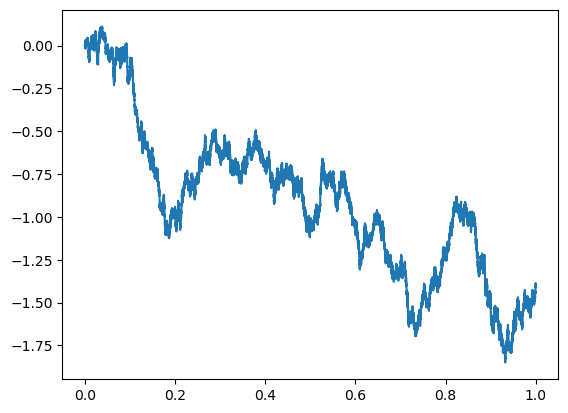

In [7]:
T = 1
N = 10**5
t = np.linspace(0, T, N)
W = WIENER_PROCESS(T,N)

plt.plot(t,W)

# Symulacja pierwszego prawa arcusa sinusa

## Wprowadzenie

Pierwsze prawo arcusa sinusa to jedno z trzech podstawowych praw opisujących ruch Browna, który jest fundamentalnym procesem stochastycznym w teorii prawdopodobieństwa i statystyce.
## Opis pierwszego prawa arcusa sinusa

Pierwsze prawo arcusa sinusa mówi o proporcji czasu, w którym proces Wienera (ruch Browna) spędza powyżej zera. Innymi słowy, jest to proporcja czasu, w którym wartość procesu jest dodatnia. Jest to kluczowy aspekt w analizie ruchu Browna, ponieważ pozwala zrozumieć, jak często i jak długo proces przebywa na poziomach powyżej zera.

## Procedura symulacji

Aby zilustrować pierwsze prawo arcusa sinusa, wykonujemy następujące kroki:

1. Generujemy proces Wienera dla określonego przedziału czasowego [0, 1]. Proces Wienera jest procesem stochastycznym, który ma nieustannie zmienne wartości.
   
2. Obliczamy czas spędzony przez proces Wienera powyżej osi OX, czyli czas, w którym wartości procesu są dodatnie.

3. Przeprowadzamy symulację wielokrotnie, generując wiele realizacji procesu Wienera. Dla każdej realizacji obliczamy proporcję czasu powyżej osi OX.

4. Budujemy histogram oraz dystrybuantę empiryczną dla uzyskanych czasów. Następnie porównujemy je z teoretycznym rozkładem arcusa sinusa, który opisuje oczekiwaną proporcję czasu spędzonego powyżej zera.

## Kod symulacji

W przytoczonym kodzie funkcje `FIRST_ARCSIN_LAW` i `FIRST_ARCSIN_LAW_PLOTS` implementują opisaną powyżej procedurę. Funkcja `FIRST_ARCSIN_LAW` oblicza proporcję czasu spędzonego powyżej osi OX dla danego procesu Wienera, podczas gdy funkcja `FIRST_ARCSIN_LAW_PLOTS` generuje realizacje procesu Wienera, oblicza proporcje czasu powyżej osi OX dla każdej realizacji, buduje histogram oraz dystrybuantę empiryczną, a następnie porównuje je z teoretycznym rozkładem arcusa sinusa.

In [8]:
def FIRST_ARCSIN_LAW(W):
    """
    Oblicza proporcję czasu spędzonego powyżej osi OX przez proces Wienera.

    Parameters:
    W (list): Proces Wienera (wektor wartości).

    Returns:
    float: Proporcja czasu, w którym wartości procesu są powyżej 0.
    
    Przykład użycia:
    >>> W = WIENER_PROCESS(1.0, 1000)
    >>> proportion_above_zero = FIRST_ARCSIN_LAW(W)
    >>> print(proportion_above_zero)
    0.531
    """
    time_above_zero = np.sum(W > 0) / len(W)
    return time_above_zero

def FIRST_ARCSIN_LAW_PLOTS(t, N, n):
    """
    Generuje wykresy empiryczne i teoretyczne dla pierwszego prawa Arcsin na podstawie n realizacji procesu Wienera.

    Parameters:
    t (float): Czas końcowy symulacji procesu Wienera.
    N (int): Liczba kroków w procesie Wienera.
    n (int): Liczba realizacji procesu Wienera.
    
    Przykład użycia:
    >>> t = 1.0
    >>> N = 1000
    >>> n = 100
    >>> FIRST_ARCSIN_LAW_PLOTS(t, N, n)
    """
    
    # Generowanie n realizacji procesu Wienera
    W = [WIENER_PROCESS(T, N) for _ in range(n)]
    
    # Obliczanie proporcji czasu powyżej osi OX dla każdej realizacji
    first_arcsin = [FIRST_ARCSIN_LAW(WS) for WS in W]
    
    # Tworzenie wykresu histogramu empirycznego
    plt.figure(figsize=(8, 6))
    plt.hist(first_arcsin, bins=200, density=True, alpha=0.6, color='g', label='Empiryczny histogram')
    
    # Generowanie danych do wykresu teoretycznej gęstości rozkładu arcsin
    x = np.linspace(0, 1, 1000)
    y = [ARCSIN_PDF(xs) for xs in x]
    
    # Rysowanie teoretycznej gęstości rozkładu arcsin na wykresie
    plt.plot(x, y, 'r-', alpha=0.4, lw=2, label='Teoretyczna gęstość')
    plt.title('Histogram pierwszego prawa Arcsin', fontsize=16)
    plt.xlabel('Wartość', fontsize=14)
    plt.ylabel('Gęstość', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(linestyle='--')
    plt.legend()
    plt.show()
    
    # Sortowanie wyników empirycznych
    arcsin_first_sorted = np.sort(first_arcsin)
    
    # Obliczanie empirycznej dystrybuanty
    arcsin_first_ecdf = np.arange(1, len(arcsin_first_sorted)+1) / len(arcsin_first_sorted)
    
    # Tworzenie wykresu empirycznej dystrybuanty
    plt.figure(figsize=(8, 6))
    plt.plot(arcsin_first_sorted, arcsin_first_ecdf, alpha=0.7, label='Empiryczna Dystrybuanta')
    
    # Generowanie danych do wykresu teoretycznej dystrybuanty rozkładu arcsin
    x = np.linspace(0, 1, 1000)
    y = [ARCSIN_CDF(xs) for xs in x]
    
    # Rysowanie teoretycznej dystrybuanty rozkładu arcsin na wykresie
    plt.plot(x, y, 'r-', alpha=0.3, lw=2, label='Teoretyczna dystrybuanta rozkładu arcsin')
    
    plt.legend()
    plt.title('Wykres dystrybuanty empirycznej dla pierwszego prawa Arcsin', fontsize=16)
    plt.xlabel('Wartość', fontsize=14)
    plt.ylabel('Dystrybuanta', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(linestyle='--')
    plt.show()


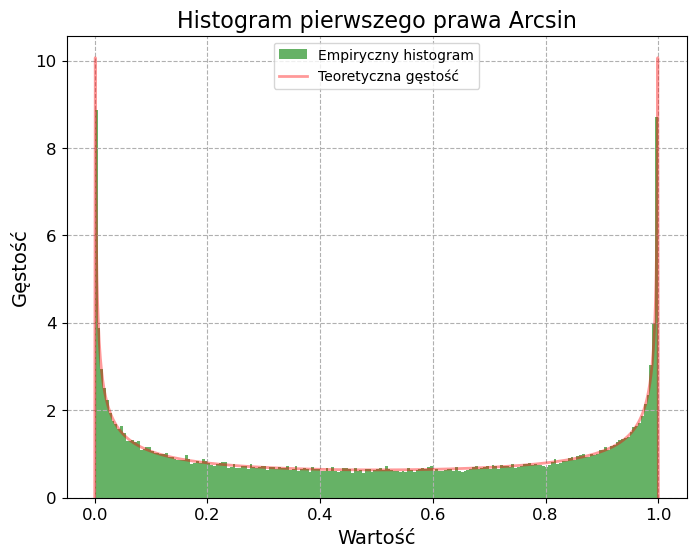

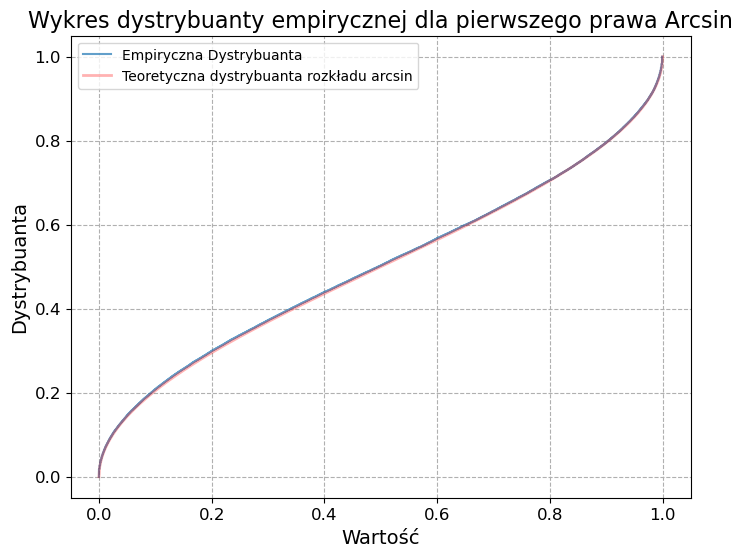

In [9]:
T = 1
N = 10**3
n = 10**5

FIRST_ARCSIN_LAW_PLOTS(T, N, n)

## Podsumowanie

Poprzez symulację pierwszego prawa arcusa sinusa możemy lepiej zrozumieć charakterystykę ruchu Browna oraz jak często proces Wienera przebywa na poziomach powyżej zera. Ta symulacja pozwala nam także porównać wyniki empiryczne z teoretycznymi oczekiwaniami, co umożliwia weryfikację matematycznych modeli opisujących ruch Browna.

# Symulacja drugiego prawa arcusa sinusa

## Wprowadzenie

Drugie prawo arcusa sinusa jest kolejnym z trzech podstawowych praw opisujących ruch Browna. Jest to kluczowe prawo w analizie ruchu Browna, które określa ostatni moment, w którym proces Wienera przecina oś OX na odcinku [0, 1]. Innymi słowy, znajduje ono moment zakończenia trajektorii procesu Wienera na osi OX w określonym przedziale czasowym.

## Opis drugiego prawa arcusa sinusa

Drugie prawo arcusa sinusa mówi o czasie trwania procesu Wienera do ostatniego momentu, w którym przekracza on oś OX w danym przedziale czasowym. Jest to istotna charakterystyka, ponieważ pozwala nam zrozumieć, jak długo proces pozostaje na poziomie zero w danym interwale czasowym.

## Procedura symulacji

Aby zilustrować drugie prawo arcusa sinusa, wykonujemy następujące kroki:

1. Generujemy proces Wienera dla określonego przedziału czasowego [0, 1].

2. Znajdujemy ostatni moment, w którym proces Wienera przecina oś OX na odcinku [0, 1].

3. Przeprowadzamy symulację wielokrotnie, generując wiele realizacji procesu Wienera. Dla każdej realizacji obliczamy czas do ostatniego momentu przecięcia oś OX.

4. Budujemy histogram oraz dystrybuantę empiryczną dla uzyskanych czasów. Następnie porównujemy je z teoretycznym rozkładem arcusa sinusa, który opisuje oczekiwany czas trwania do ostatniego momentu przekroczenia oś OX.

## Kod symulacji

W przedstawionym kodzie funkcje `SECOND_ARCSIN_LAW` i `SECOND_ARCSIN_LAW_PLOTS` implementują opisaną powyżej procedurę. Funkcja `SECOND_ARCSIN_LAW` znajduje ostatni moment przecięcia procesu Wienera oś OX na odcinku [0, 1], podczas gdy funkcja `SECOND_ARCSIN_LAW_PLOTS` generuje realizacje procesu Wienera, oblicza czasy do ostatniego momentu przecięcia oś OX dla każdej realizacji, buduje histogram oraz dystrybuantę empiryczną, a następnie porównuje je z teoretycznym rozkładem arcusa sinusa.

In [10]:
def SECOND_ARCSIN_LAW(W):
    """
    Znajduje ostatni moment uderzenia procesu Wienera na odcinku [0, 1] w oś OX.

    Parameters:
    W (list): Proces Wienera (wektor wartości).

    Returns:
    float: Ostatni moment, w którym proces Wienera jest równy 0.
    
    Przykład użycia:
    >>> W = WIENER_PROCESS(1.0, 1000)
    >>> last_zero_crossing_time = SECOND_ARCSIN_LAW(W)
    >>> print(last_zero_crossing_time)
    0.786
    """
    last_zero_crossing = -1
    
    for i in range(1, len(W)):
        if W[i-1] * W[i] < 0:
            last_zero_crossing = i

    if last_zero_crossing == -1:
        return 0.0
    
    return last_zero_crossing / len(W)

def SECOND_ARCSIN_LAW_PLOTS(t, N, n):
    """
    Generuje wykresy empiryczne i teoretyczne dla drugiego prawa Arcsin na podstawie n realizacji procesu Wienera.

    Parameters:
    t (float): Czas końcowy symulacji procesu Wienera.
    N (int): Liczba kroków w procesie Wienera.
    n (int): Liczba realizacji procesu Wienera.
    
    Przykład użycia:
    >>> t = 1.0
    >>> N = 1000
    >>> n = 100
    >>> SECOND_ARCSIN_LAW_PLOTS(t, N, n)
    """
    
    # Generowanie n realizacji procesu Wienera
    W = [WIENER_PROCESS(T, N) for _ in range(n)]
    
    # Obliczanie ostatniego momentu uderzenia procesu Wienera na odcinku [0, 1] w oś OX.
    second_arcsin = [SECOND_ARCSIN_LAW(WS) for WS in W]
    
    # Tworzenie wykresu histogramu empirycznego
    plt.figure(figsize=(8, 6))
    plt.hist(second_arcsin, bins=200, density=True, alpha=0.6, color='g', label='Empiryczny histogram')
    
    # Generowanie danych do wykresu teoretycznej gęstości rozkładu arcsin
    x = np.linspace(0, 1, 1000)
    y = [ARCSIN_PDF(xs) for xs in x]
    
    # Rysowanie teoretycznej gęstości rozkładu arcsin na wykresie
    plt.plot(x, y, 'r-', alpha=0.4, lw=2, label='Teoretyczna gęstość')
    plt.title('Histogram drugiego prawa Arcsin', fontsize=16)
    plt.xlabel('Wartość', fontsize=14)
    plt.ylabel('Gęstość', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.grid(linestyle='--')
    plt.show()
    
    # Sortowanie wyników empirycznych
    arcsin_second_sorted = np.sort(second_arcsin)
    
    # Obliczanie empirycznej dystrybuanty
    arcsin_second_ecdf = np.arange(1, len(arcsin_second_sorted)+1) / len(arcsin_second_sorted)
    
    # Tworzenie wykresu empirycznej dystrybuanty
    plt.figure(figsize=(8, 6))
    plt.plot(arcsin_second_sorted, arcsin_second_ecdf, alpha=0.7, label='Empiryczna Dystrybuanta')
    
    # Generowanie danych do wykresu teoretycznej dystrybuanty rozkładu arcsin
    x = np.linspace(0, 1, 1000)
    y = [ARCSIN_CDF(xs) for xs in x]
    
    # Rysowanie teoretycznej dystrybuanty rozkładu arcsin na wykresie
    plt.plot(x, y, 'r-', alpha=0.3, lw=2, label='Teoretyczna dystrybuanta rozkładu arcsin')
    
    plt.legend()
    plt.title('Wykres dystrybuanty empirycznej dla drugiego prawa Arcsin', fontsize=16)
    plt.xlabel('Wartość', fontsize=14)
    plt.ylabel('Dystrybuanta', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(linestyle='--')
    plt.show()


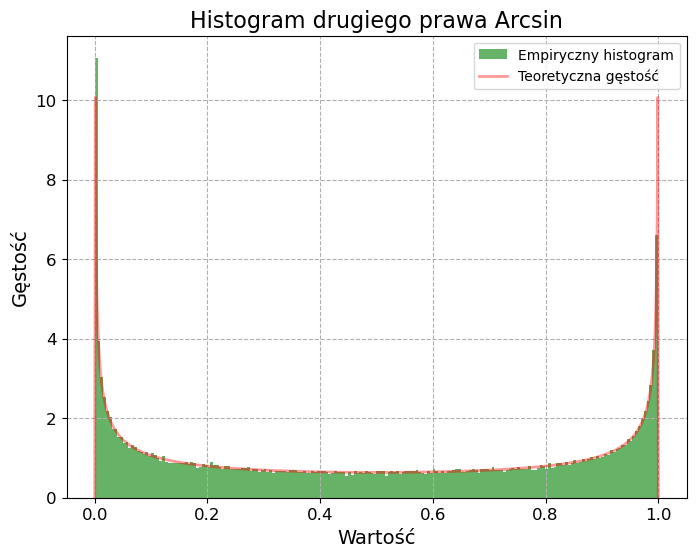

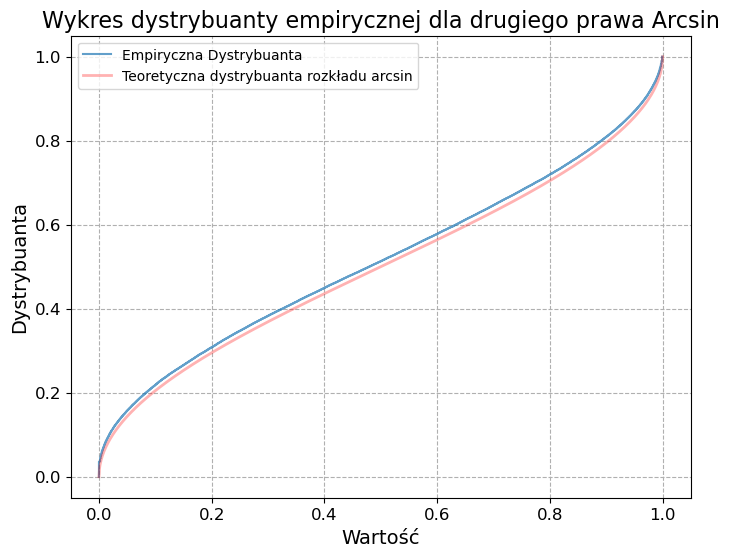

In [11]:
T = 1
N = 10**3
n = 10**5

SECOND_ARCSIN_LAW_PLOTS(T, N, n)

## Podsumowanie

Poprzez symulację drugiego prawa arcusa sinusa możemy lepiej zrozumieć dynamikę i charakterystykę ruchu Browna, szczególnie w kontekście czasu trwania trajektorii na poziomie zero. Ta symulacja umożliwia również porównanie wyników empirycznych z teoretycznymi oczekiwaniami.

# Symulacja trzeciego prawa arcusa sinusa

## Wprowadzenie

Trzecie prawo arcusa sinusa jest jednym z trzech fundamentalnych praw opisujących ruch Browna. Określa ono moment osiągnięcia maksymalnej wartości przez proces Wienera na odcinku [0, 1]. Jest to istotne w analizie ruchu Browna, ponieważ pozwala nam zrozumieć, kiedy i gdzie proces osiąga swoje maksymalne wartości w danym przedziale czasowym.

## Opis trzeciego prawa arcusa sinusa

Trzecie prawo arcusa sinusa mówi o czasie, w którym proces Wienera osiąga swoją maksymalną wartość na odcinku [0, 1]. Jest to kluczowa charakterystyka, która pozwala nam lepiej zrozumieć dynamikę ruchu Browna i zachowanie się procesu w określonym przedziale czasowym.

## Procedura symulacji

Aby zilustrować trzecie prawo arcusa sinusa, wykonujemy następujące kroki:

1. Generujemy proces Wienera dla określonego przedziału czasowego [0, 1].

2. Znajdujemy moment osiągnięcia maksymalnej wartości przez proces Wienera na odcinku [0, 1].

3. Przeprowadzamy symulację wielokrotnie, generując wiele realizacji procesu Wienera. Dla każdej realizacji obliczamy czas do osiągnięcia maksymalnej wartości.

4. Budujemy histogram oraz dystrybuantę empiryczną dla uzyskanych czasów. Następnie porównujemy je z teoretycznym rozkładem arcusa sinusa, który opisuje oczekiwany moment osiągnięcia maksymalnej wartości przez proces Wienera.

## Kod symulacji

W przedstawionym kodzie funkcje `THIRD_ARCSIN_LAW` i `THIRD_ARCSIN_LAW_PLOTS` implementują opisaną powyżej procedurę. Funkcja `THIRD_ARCSIN_LAW` znajduje moment osiągnięcia maksymalnej wartości przez proces Wienera na odcinku [0, 1], podczas gdy funkcja `THIRD_ARCSIN_LAW_PLOTS` generuje realizacje procesu Wienera, oblicza czasy do osiągnięcia maksymalnej wartości dla każdej realizacji, buduje histogram oraz dystrybuantę empiryczną, a następnie porównuje je z teoretycznym rozkładem arcusa sinusa.


In [12]:
def THIRD_ARCSIN_LAW(W):
    """
    Znajduje moment osiągnięcia maksymalnej wartości przez proces Wienera na odcinku [0, 1].

    Parameters:
    W (list): Proces Wienera (wektor wartości).

    Returns:
    float: Moment osiągnięcia maksymalnej wartości przez proces Wienera.
   
   Przykład użycia:
    >>> W = WIENER_PROCESS(1.0, 1000)
    >>> max_time = THIRD_ARCSIN_LAW(W)
    >>> print(max_time)
    0.723
    """
    max_value = W[0]
    max_index = 0

    # Ręczne znajdowanie indeksu maksymalnej wartości
    for i in range(1, len(W)):
        if W[i] > max_value:
            max_value = W[i]
            max_index = i

    # Podziel indeks przez długość wektora, aby uzyskać moment w skali [0, 1]
    return max_index / len(W)

def THIRD_ARCSIN_LAW_PLOTS(t, N, n):
    """
    Generuje wykresy empiryczne i teoretyczne dla trzeciego prawa Arcsin na podstawie n realizacji procesu Wienera.

    Parameters:
    t (float): Czas końcowy symulacji procesu Wienera.
    N (int): Liczba kroków w procesie Wienera.
    n (int): Liczba realizacji procesu Wienera.
    
    Przykład użycia:
    >>> t = 1.0
    >>> N = 1000
    >>> n = 100
    >>> THIRD_ARCSIN_LAW_PLOTS(t, N, n)
    """
    
    # Generowanie n realizacji procesu Wienera
    W = [WIENER_PROCESS(T, N) for _ in range(n)]
    
    # Obliczanie momentu osiągnięcia maksymalnej wartości przez proces Wienera na odcinku [0, 1].
    third_arcsin = [THIRD_ARCSIN_LAW(WS) for WS in W]
    
    # Tworzenie wykresu histogramu empirycznego
    plt.figure(figsize=(8, 6))
    plt.hist(third_arcsin, bins=200, density=True, alpha=0.6, color='g', label='Empiryczny histogram')
    
    # Generowanie danych do wykresu teoretycznej gęstości rozkładu arcsin
    x = np.linspace(0, 1, 1000)
    y = [ARCSIN_PDF(xs) for xs in x]
    
    # Rysowanie teoretycznej gęstości rozkładu arcsin na wykresie
    plt.plot(x, y, 'r-', alpha=0.4, lw=2, label='Teoretyczna gęstość')
    plt.title('Histogram trzeciego prawa Arcsin', fontsize=16)
    plt.xlabel('Wartość', fontsize=14)
    plt.ylabel('Gęstość', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(linestyle='--')
    plt.legend()
    plt.show()
    
    # Sortowanie wyników empirycznych
    arcsin_third_sorted = np.sort(third_arcsin)
    
    # Obliczanie empirycznej dystrybuanty
    arcsin_third_ecdf = np.arange(1, len(arcsin_third_sorted)+1) / len(arcsin_third_sorted)
    
    # Tworzenie wykresu empirycznej dystrybuanty
    plt.figure(figsize=(8, 6))
    plt.plot(arcsin_third_sorted, arcsin_third_ecdf, alpha=0.7, label='Empiryczna Dystrybuanta')
    
    # Generowanie danych do wykresu teoretycznej dystrybuanty rozkładu arcsin
    x = np.linspace(0, 1, 1000)
    y = [ARCSIN_CDF(xs) for xs in x]
    
    # Rysowanie teoretycznej dystrybuanty rozkładu arcsin na wykresie
    plt.plot(x, y, 'r-', alpha=0.3, lw=2, label='Teoretyczna dystrybuanta rozkładu arcsin')
    
    plt.legend()
    plt.title('Wykres dystrybuanty empirycznej dla trzeciego prawa Arcsin', fontsize=16)
    plt.xlabel('Wartość', fontsize=14)
    plt.ylabel('Dystrybuanta', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(linestyle='--')
    plt.show()

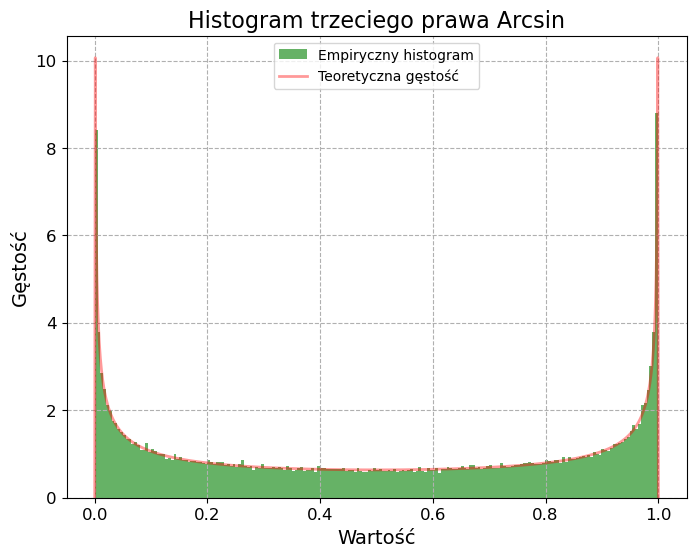

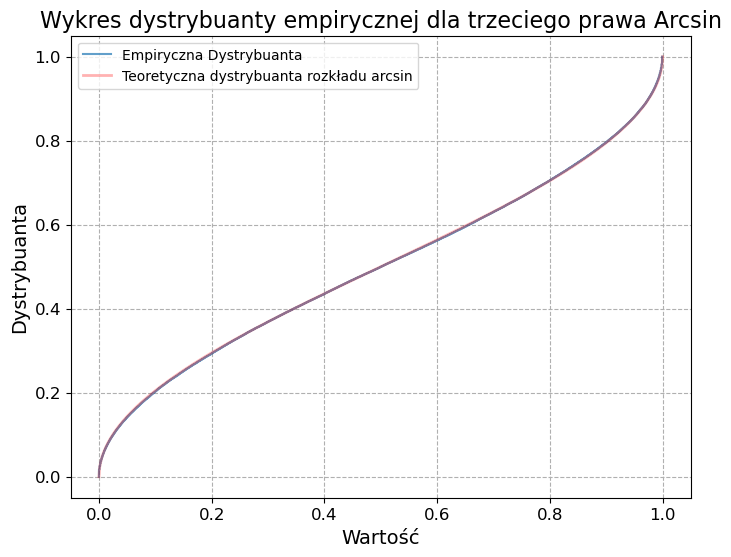

In [13]:
T = 1
N = 10**3
n = 10**5

THIRD_ARCSIN_LAW_PLOTS(T, N, n)

## Podsumowanie

Symulacja trzeciego prawa arcusa sinusa pozwala nam lepiej zrozumieć moment osiągnięcia maksymalnej wartości przez proces Wienera oraz jak często i w jakim czasie proces osiąga swoje maksymalne wartości. Ta symulacja umożliwia również porównanie wyników empirycznych z teoretycznymi oczekiwaniami, co pozwala na ocenę adekwatności matematycznych modeli opisujących ruch Browna.

# Wnioski

Symulacja praw arcusa sinusa umożliwia lepsze zrozumienie dynamiki ruchu Browna i charakterystyk trajektorii procesu Wienera. Dzięki tej symulacji możemy analizować różne aspekty zachowania się procesu, a także weryfikować matematyczne modele opisujące ruch Browna na podstawie danych empirycznych.